# Combinación de librerías en Jupyter

En Python, es muy usual combinar varias librerías especializadas para analizar datos de negocios desde la perspectiva de la analítica de datos. Acá mostramos un ejemplo sencillo.

In [1]:
import pandas as pd                # Librería para abrir un archivo
import matplotlib as plt           # Librería para gráficos
import seaborn as sns              # Librería para resumir datos con gráficos
plt.rcParams['figure.dpi'] = 300   # Para mejorar la resolución gráfica
plt.rcParams['savefig.dpi'] = 300  # Para mejorar la resolución gráfica

Ahora vamos a abrir los mismos datos que vimos en "Mi Primer Jupyter" y con la opción datos.head() podemos ver las primeras cinco filas de tales datos.

In [2]:
url = "https://raw.githubusercontent.com/jcorrean/ItinerarioPython/main/newdata.csv"   # Link del repositorio Github de datos
datos = pd.read_csv(url)   # Cargue del archivo del datos "newdata" al dataframe "datos" para su procesamiento
datos.head()

,Moment,number,web,Name of Provider,Number of Comments,Expected Delivery Time,Minimum Charge Ordering,Cost Delivery,Latitude,Longitude,Typical Traffic Afternoon,Typical Traffic Noon,Typical Traffic Morning,DailyTraffic,ClientLatitude,ClientLongitude,Distance(mts),Time(sec),Time(min)
0,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329.0,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.665798,-74.040855,2500,660,11.0
1,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329.0,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.666159,-74.038331,3300,720,12.0
2,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329.0,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.670228,-74.026783,9100,1740,29.0
3,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329.0,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.662140,-74.008008,9700,1740,29.0
4,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329.0,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.669905,-74.104917,8800,1320,22.0


Dos funciones sencillas pero importantes son:

* len(datos): Nos devuelve el número de filas de una base de datos.
* len(datos.columns): Nos devuelve el número de columnas de una base de datos.

In [3]:
len(datos.columns)         # Numero de columnas del dataframe "datos"

19

In [4]:
len(datos)                 # Numero de filas del dataframe "datos"

19934

## Resumir datos
En la analítica de datos, una de las tareas más comunes es resumir datos. Por ejemplo, de la base de datos anterior podríamos solicitar un resumen estadístico sobre el costo de ordenar comida a domicilio.

In [5]:
datos['Cost Delivery'].describe()      # Principales estadisticos de la variable

count    14271.000000
mean      2580.827116
std       1411.358955
min          0.000000
25%       2000.000000
50%       2800.000000
75%       3200.000000
max      15000.000000
Name: Cost Delivery, dtype: float64

Observe que dentro de los datos hay una columna llamada Cost Delivery. Entonces cuando se escribe datos['Cost Delivery'] se le indica a Python que se enfoque únicamente en dicha columna. Luego, inmediatamente y sin espacios se ha escrito describe()

Entonces, toda la sintaxis que hemos escrito arriba significa "resuma la variable Cost Delivery que se encuentra en la base de datos" llamada datos.

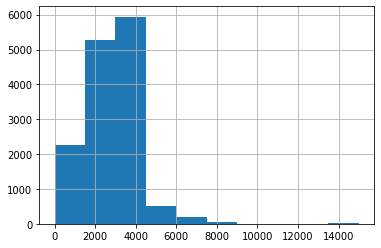

In [6]:
datos['Cost Delivery'].hist()     # Realiza un histograma de la variable Cost Delivery

Lo anterior es apenas para ir calentando motores. En el mundo real, nos interesa más saber las relaciones entre muchas variables. Y para ello, suelen crearse nuevas bases de datos con un subconjunto de las variables. Supongamos que nos interesa analizar las siguientes variables: 
* Number of Comments (El número de comentarios de clientes para cada restaurante)
* Expected Delivery Time (El tiempo prometido por el restaurante para entregar la comida a domicilio)
* Minimum Charge Ordering (El monto mínimo de la compra que debe hacer el cliente para recibir la comida a domicilio)
* Cost Delivery (El valor del servicio por entregar la comida a domicilio)
* Time(min) (El tiempo en minutos estimado según Google Maps entre el lugar donde está el restaurante y el lugar donde está el cliente).
* Distance(mts) (La distancia en metros que separan al restaurante del cliente)

Para ello, podríamos crear una segunda base de datos que contenga únicamente estas variables.

In [7]:
datos2 = datos[['Number of Comments', 'Expected Delivery Time', 'Minimum Charge Ordering', 'Cost Delivery', 'Time(min)', 'Distance(mts)']]
datos2.tail()     # Muestra los ultimos cinco registros. 

,Number of Comments,Expected Delivery Time,Minimum Charge Ordering,Cost Delivery,Time(min),Distance(mts)
19929,0.0,45.0,NaN,3000.0,17.0,7900
19930,0.0,45.0,NaN,3000.0,57.0,24700
19931,0.0,45.0,NaN,3000.0,10.0,2900
19932,0.0,45.0,NaN,3000.0,11.0,4200
19933,0.0,45.0,NaN,3000.0,9.0,2900


Ahora, podríamos pedir el resumen estadístico de las variables incluidas en "datos2"

In [8]:
datos2.describe()

,Number of Comments,Expected Delivery Time,Minimum Charge Ordering,Cost Delivery,Time(min),Distance(mts)
count,14727.000000,18558.000000,16906.000000,14271.000000,19910.000000,19934.000000
mean,200.618795,44.592305,13078.368627,2580.827116,21.048368,8536.884870
std,794.873828,12.603421,11671.185974,1411.358955,13.419063,6074.309472
min,0.000000,5.000000,2000.000000,0.000000,1.000000,12.000000
25%,3.000000,40.000000,9900.000000,2000.000000,11.000000,3700.000000
50%,26.000000,45.000000,10000.000000,2800.000000,19.000000,7500.000000
75%,139.000000,45.000000,15000.000000,3200.000000,28.000000,11800.000000
max,12832.000000,90.000000,260000.000000,15000.000000,59.000000,54400.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4502c12f90>,
      dtype=object)

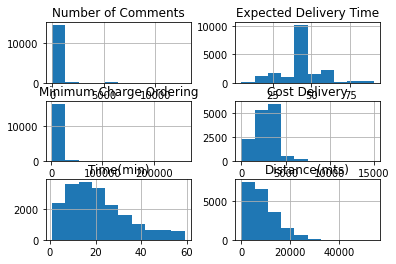

In [9]:
datos2.hist()   #presenta un histograma de cada una de las cinco variables del conjutno creado en el paso anterior 

Aunque con pandas hemos logrado sacar histogramas para estas variables, ahora con la librería seaborn podemos crea un gráfico que muestre las relaciones entre pares de variables

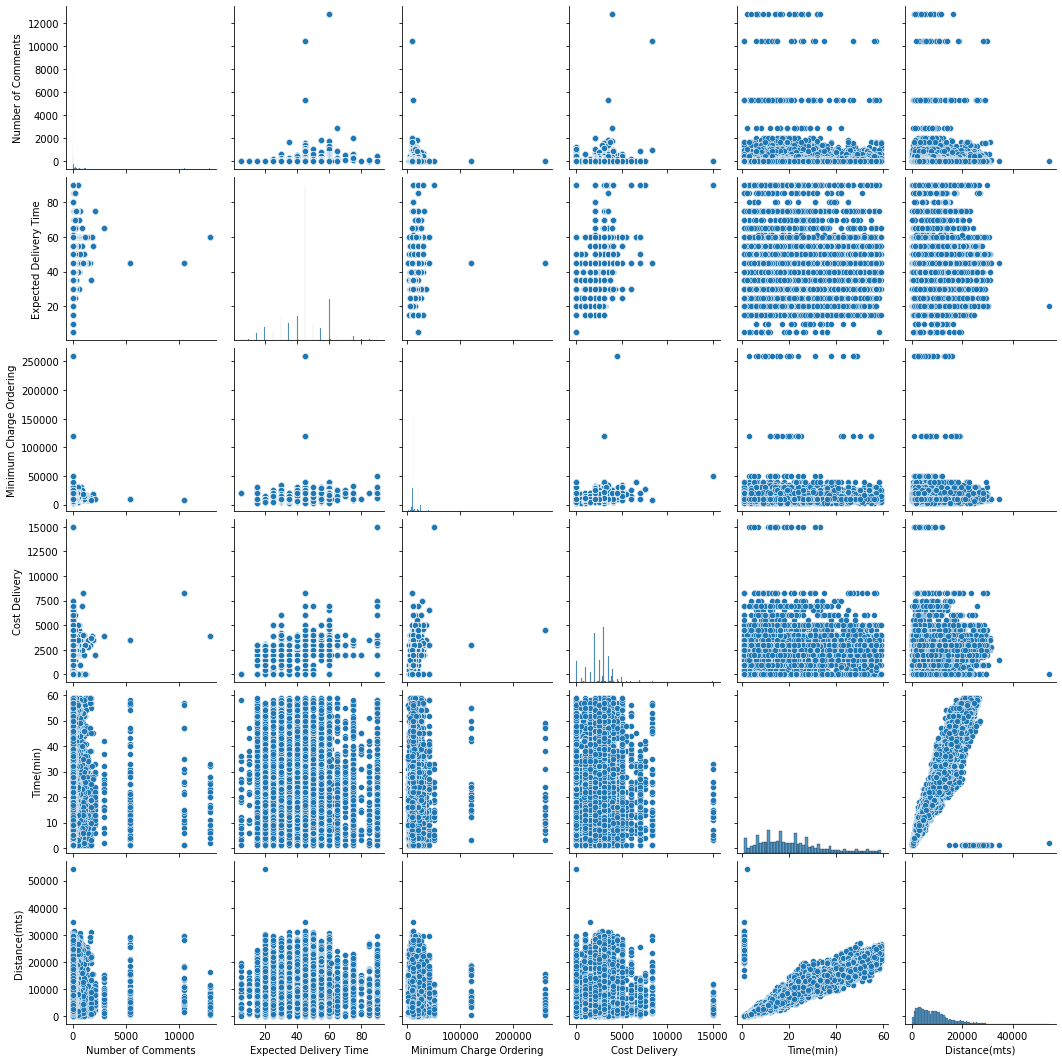

In [10]:
sns.pairplot(datos2)   # Muestra la relacion entre pares de variables

Ahora vamos a incluir una variables más (la variable Moment) para ver si los tiempos de desplazamiento estimados por Google cambian según el momento del día para entregar la comida a domicilio.

In [11]:
datos3 = datos[['Expected Delivery Time', 'Time(min)', 'Moment']]
datos3.head(2)

,Expected Delivery Time,Time(min),Moment
0,45.0,11.0,Morning
1,45.0,12.0,Morning


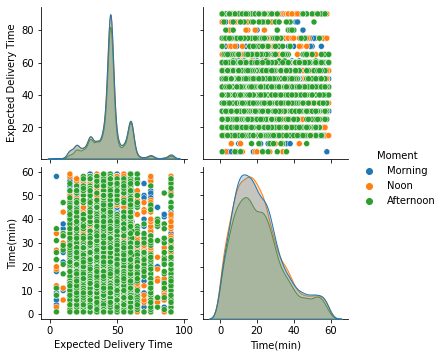

In [12]:
sns.pairplot(datos3, hue="Moment")

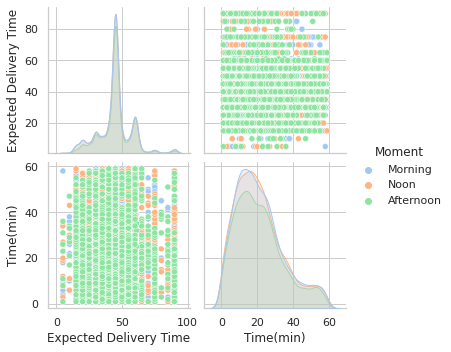

In [13]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.pairplot(datos3, hue="Moment")

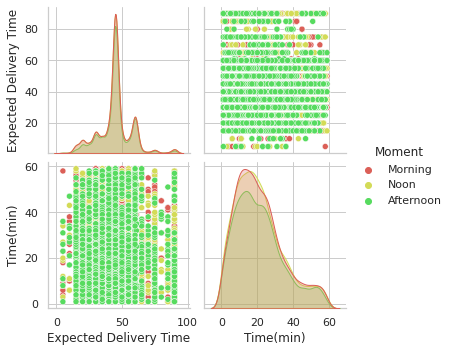

In [14]:
sns.set_theme(style="whitegrid", palette="hls")
sns.pairplot(datos3, hue="Moment")